# Fashion Retail Dataset

### Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Loading Data

In [8]:
filepath = "/Users/hokage/VS_Directory/TI_Analytical/Fashion_Retail_Sales.csv"
fash1 = pd.read_csv(filepath)
fash1.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


### Data Exploration

##### Central Tendency

In [ ]:
fash1.describe()

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


##### Columns

In [11]:
cols = fash1.columns
print(cols)

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')


##### Data Types

In [14]:
print(fash1.dtypes)


Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object


### Null Values

In [13]:
print(fash1.isnull().sum())

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


#### Dropping NULL Values

In [15]:
fash2 = fash1.dropna(subset=['Purchase Amount (USD)'])
fash2 

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash
...,...,...,...,...,...,...
3394,4040,Tank Top,113.0,20-01-2023,1.2,Credit Card
3395,4118,Shorts,37.0,09-07-2023,2.7,Cash
3396,4056,Slippers,176.0,16-03-2023,2.5,Cash
3398,4042,Sandals,128.0,01-01-2023,1.8,Cash


#### Converting Date From STRING

In [21]:
fash2.loc[:, 'Date Purchase'] = pd.to_datetime(fash2['Date Purchase'], format='%d-%m-%Y')
print("Data type after conversion:", fash2['Date Purchase'].dtype)

Data type after conversion: datetime64[ns]


#### Grouping Data

In [ ]:
grouped = fash2.groupby('Item Purchased').agg({
    'Purchase Amount (USD)': ['count','sum'],  # Count, total, and average purchase amount
    'Review Rating': 'mean',                           # Average review rating
    'Payment Method': lambda x: x.mode()[0] if not x.empty else None  # Most common payment method
})

In [31]:
grouped.columns = [
    'Number of Purchases',
    'Total Purchase Amount (USD)',
    'Average Review Rating',
    'Most Common Payment Method'
]
print(grouped)

                Number of Purchases  Total Purchase Amount (USD)  \
Item Purchased                                                     
Backpack                     6168.0                   112.145455   
Belt                        10484.0                   151.942029   
Blazer                       9985.0                   184.907407   
Blouse                      10472.0                   183.719298   
Boots                       11891.0                   228.673077   
Bowtie                       8705.0                   197.840909   
Camisole                     6136.0                    98.967742   
Cardigan                     9270.0                   151.967213   
Coat                         5554.0                   106.807692   
Dress                        4107.0                    93.340909   
Flannel Shirt                5426.0                   102.377358   
Flip-Flops                  11309.0                   275.829268   
Gloves                      12330.0             

# Visual Exploration

### Payment METHOD BREAKDOWN    

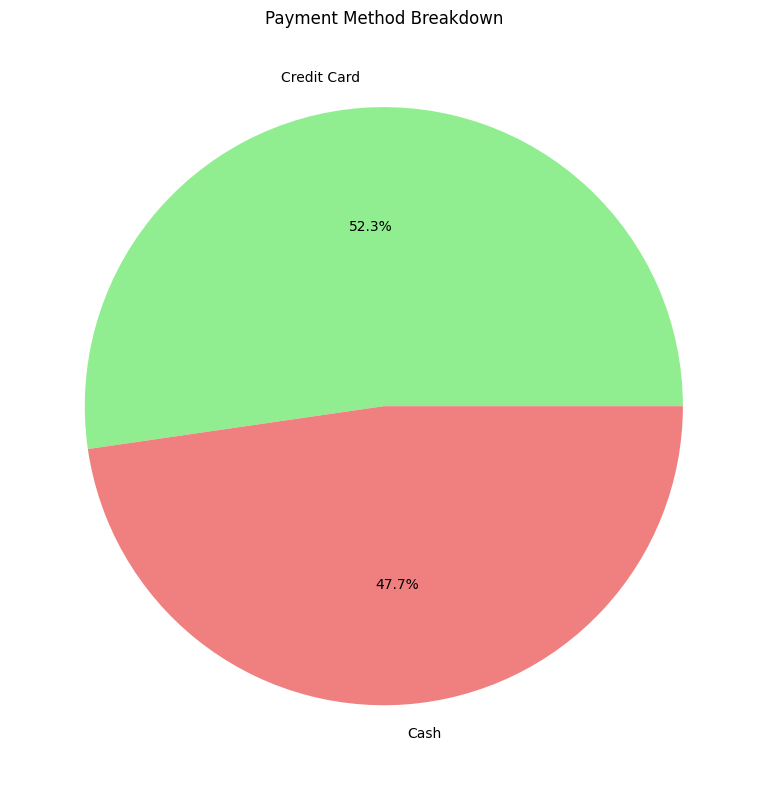

In [24]:
payment_counts = fash2['Payment Method'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Payment Method Breakdown')
plt.tight_layout()
plt.show()

### Analysis of the most popular payment method
- it seems that theres a pretty even split between the 2 modes of payment with 6% more opting for credit card
- this could be due to the fact that credit cards are widely accepted 
- as well as being very convenient to use as most retail shops opt to using the tap to pay method

#

### Sales Over Time

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_77071/2455250250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fash2['Month'] = fash2['Date Purchase'].dt.to_period('M')


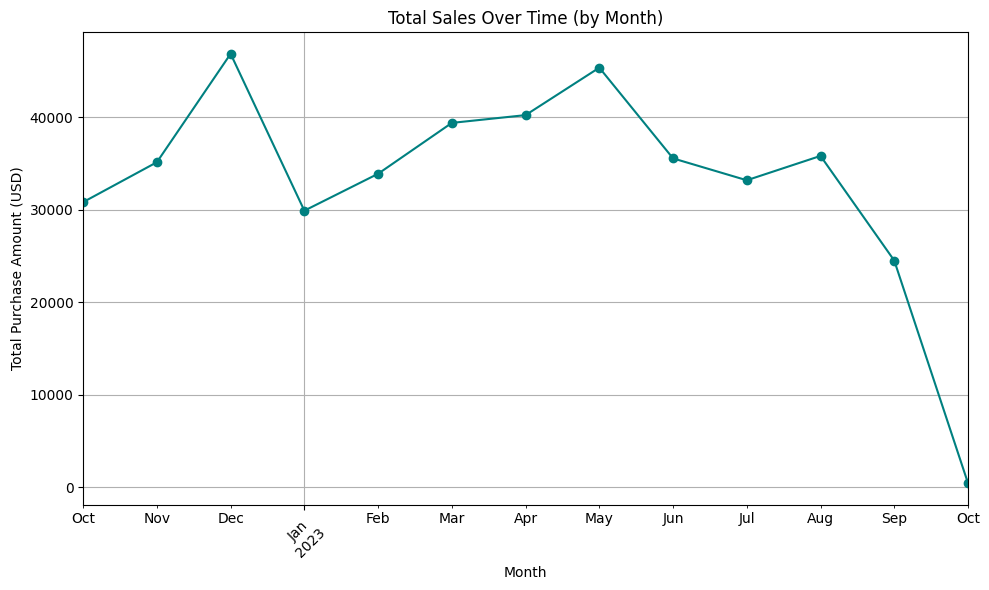

In [25]:
fash2['Month'] = fash2['Date Purchase'].dt.to_period('M')
sales_by_month = fash2.groupby('Month')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', marker='o', color='teal')
plt.title('Total Sales Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Grouped Data

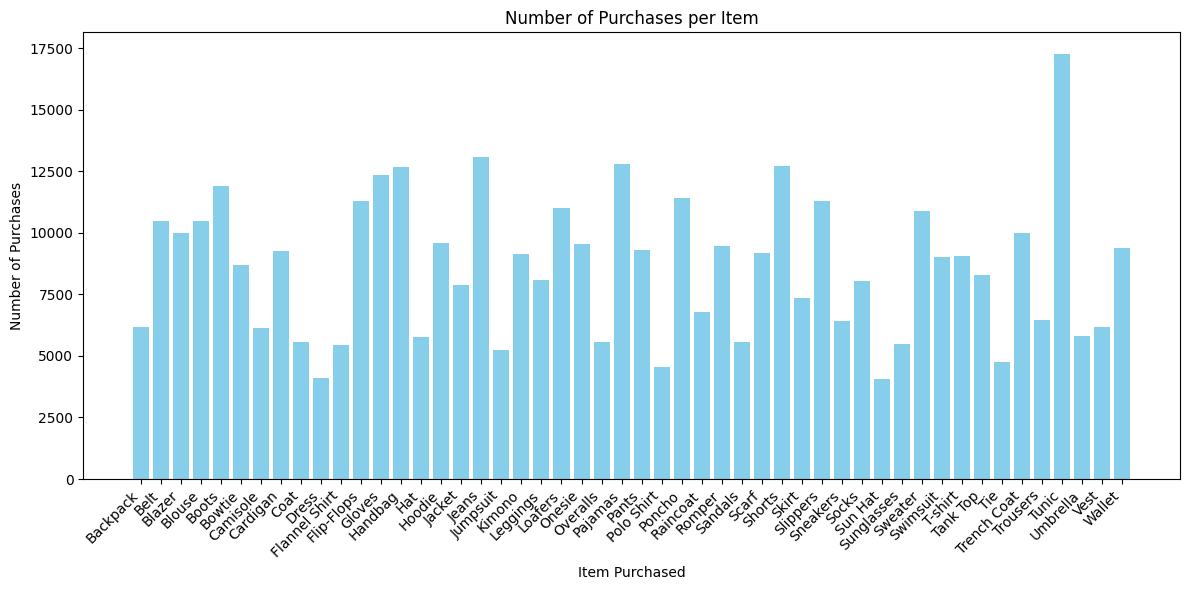

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped['Number of Purchases'], color='skyblue')
plt.title('Number of Purchases per Item')
plt.xlabel('Item Purchased')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

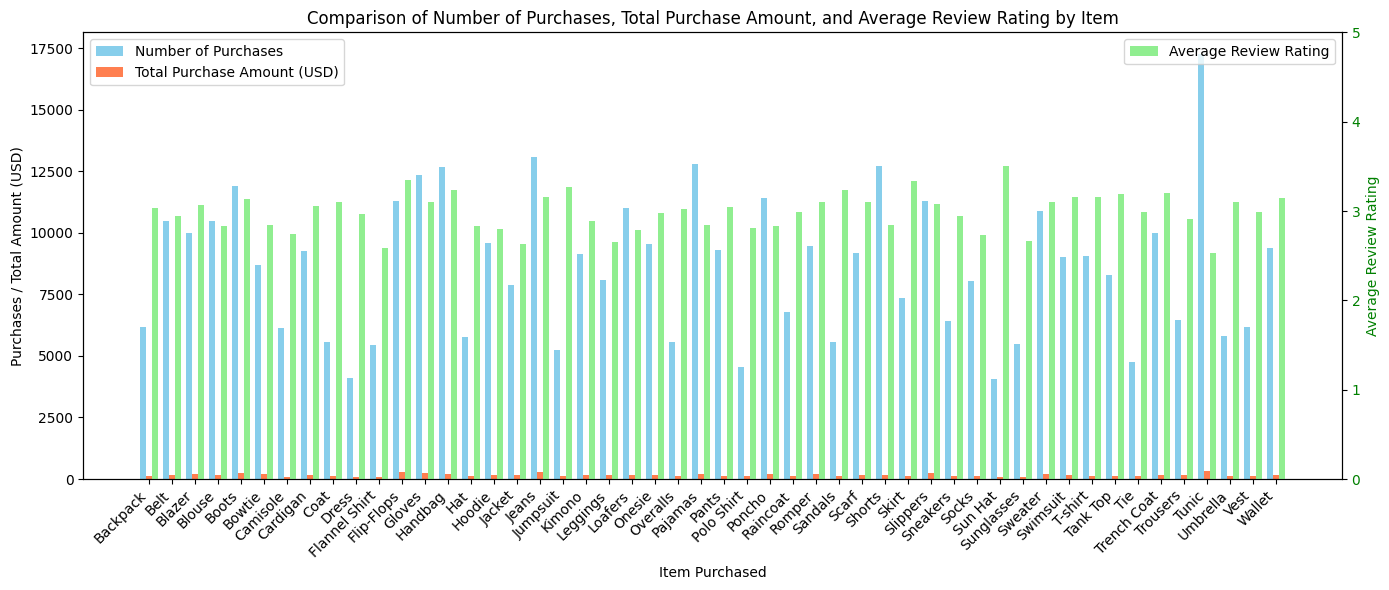

In [ ]:
items = grouped.index
num_purchases = grouped['Number of Purchases']
total_purchase = grouped['Total Purchase Amount (USD)']
avg_rating = grouped['Average Review Rating']
bar_width = 0.25
x = np.arange(len(items))
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.bar(x - bar_width, num_purchases, bar_width, label='Number of Purchases', color='skyblue')
ax1.bar(x, total_purchase, bar_width, label='Total Purchase Amount (USD)', color='coral')
ax1.set_xlabel('Item Purchased')
ax1.set_ylabel('Purchases / Total Amount (USD)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(items, rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.bar(x + bar_width, avg_rating, bar_width, label='Average Review Rating', color='lightgreen')
ax2.set_ylabel('Average Review Rating', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 5)  
ax2.legend(loc='upper right')
plt.title('Comparison of Number of Purchases, Total Purchase Amount, and Average Review Rating by Item')
fig.tight_layout()
plt.show()

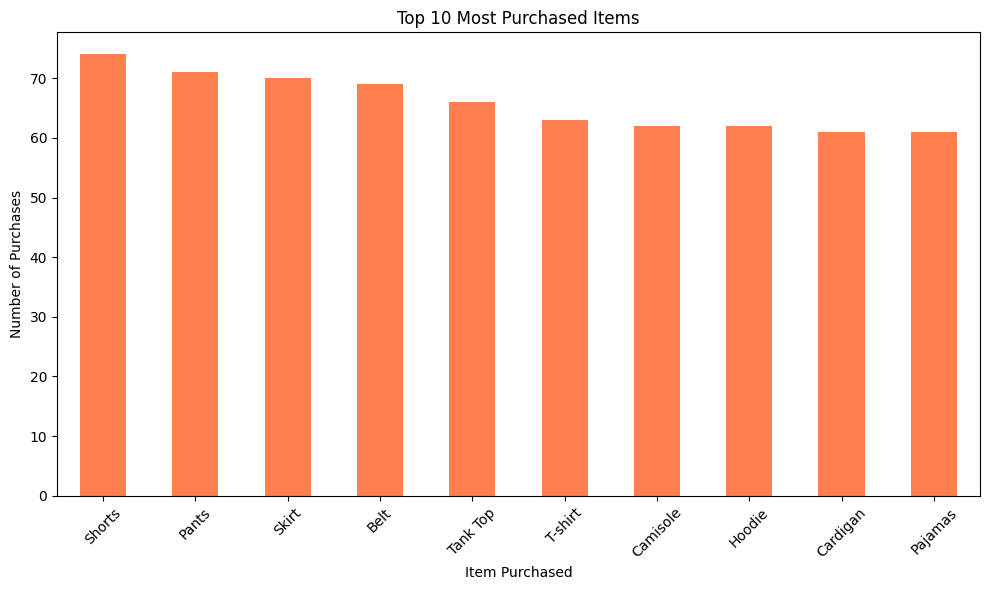

In [44]:
top_items = fash2['Item Purchased'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='coral')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Item Purchased')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

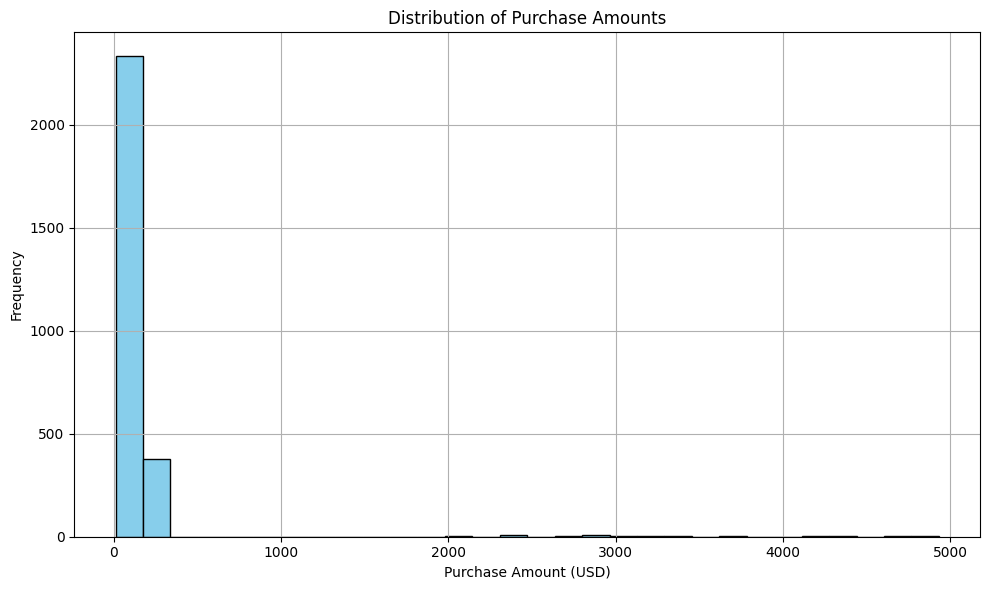

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(fash2['Purchase Amount (USD)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_77071/3817595575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fash2, x=pd.qcut(fash2['Purchase Amount (USD)'], q=10), y='Review Rating', palette='Blues')


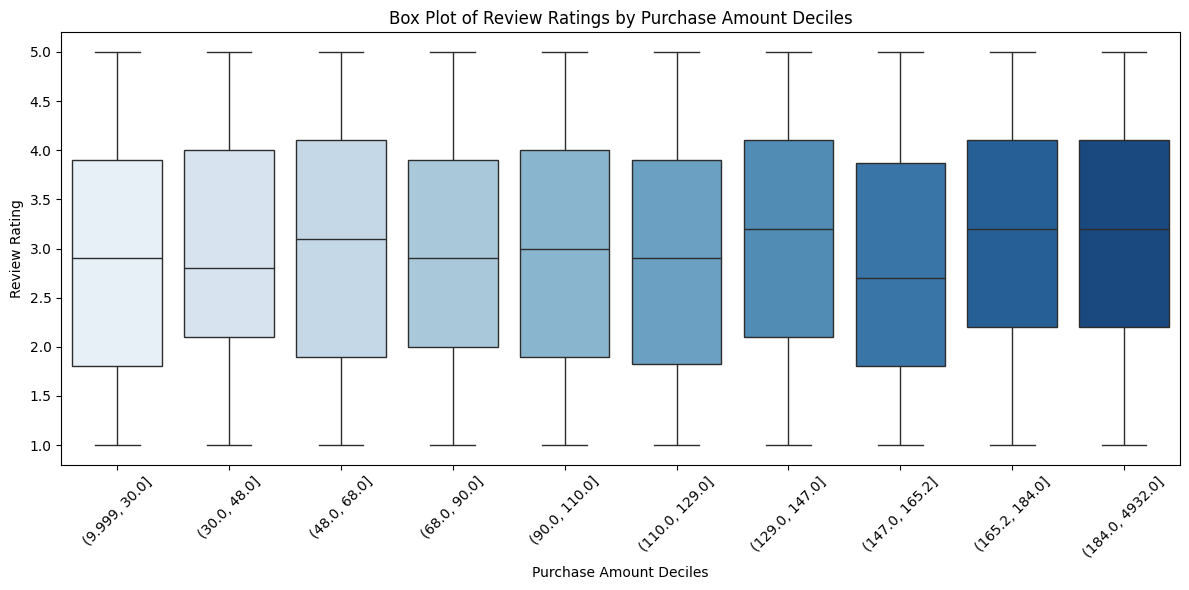

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=fash2, x=pd.qcut(fash2['Purchase Amount (USD)'], q=10), y='Review Rating', palette='Blues')
plt.title('Box Plot of Review Ratings by Purchase Amount Deciles')
plt.xlabel('Purchase Amount Deciles')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_77071/1764782942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fash2['Purchase Bin'] = pd.cut(fash2['Purchase Amount (USD)'], bins=10)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_77071/1764782942.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=fash2, x='Purchase Bin', y='Review Rating', scale='width', inner='quartile', palette='Blues')
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_77071/1764782942.py:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass 

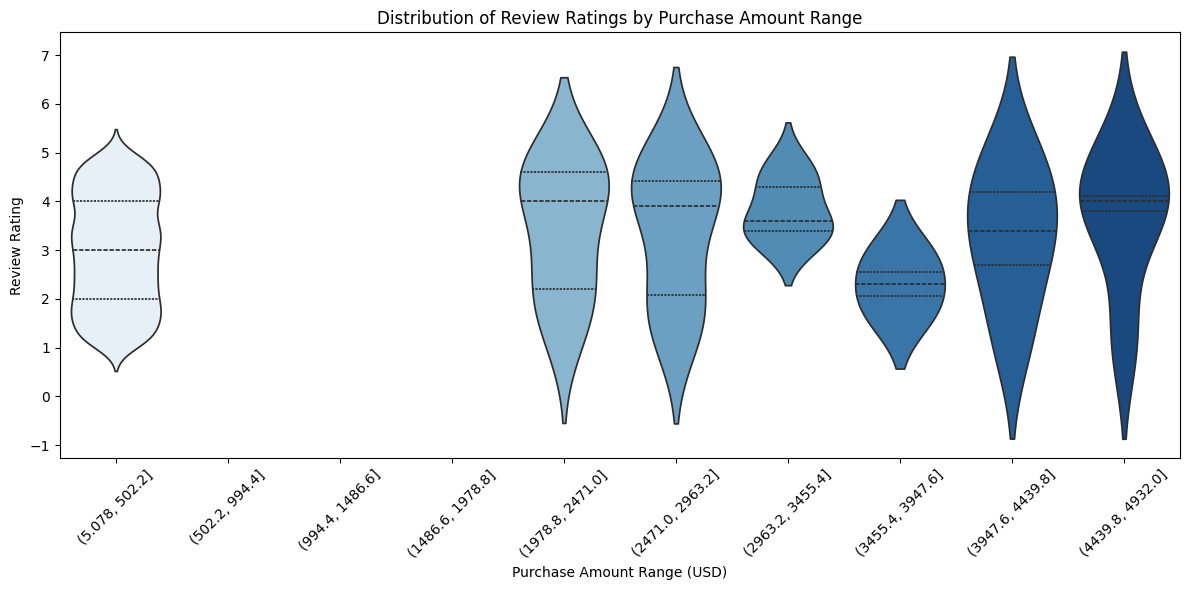

In [59]:
import seaborn as sns

# Create bins for Purchase Amount
fash2['Purchase Bin'] = pd.cut(fash2['Purchase Amount (USD)'], bins=10)

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=fash2, x='Purchase Bin', y='Review Rating', scale='width', inner='quartile', palette='Blues')
plt.title('Distribution of Review Ratings by Purchase Amount Range')
plt.xlabel('Purchase Amount Range (USD)')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


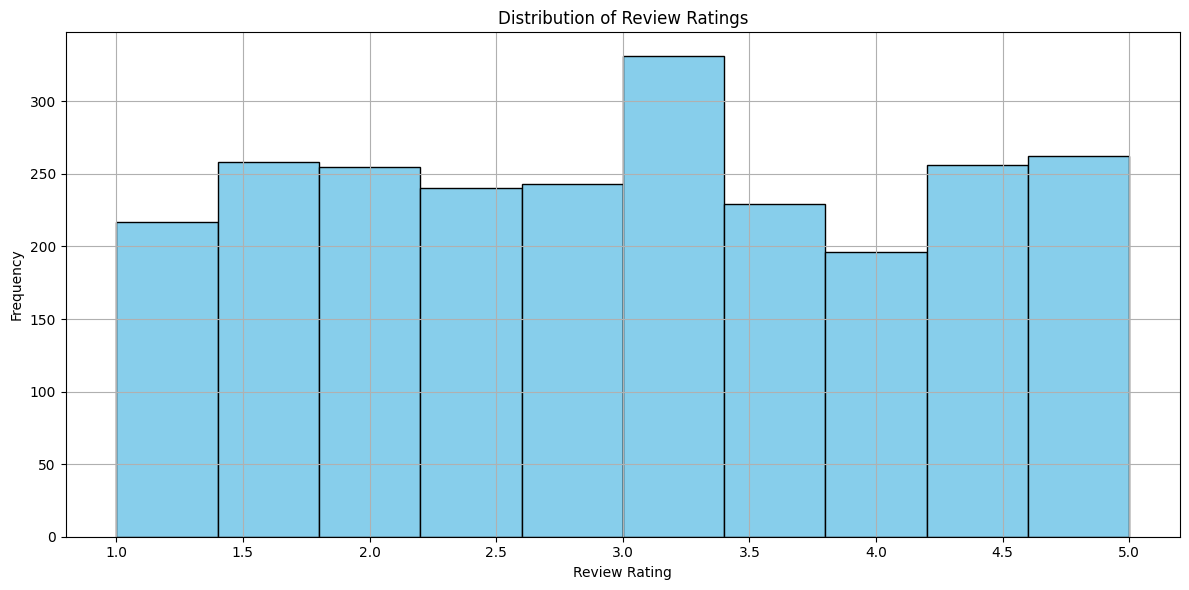

In [60]:
# plotting histogram
plt.figure(figsize=(12, 6))
plt.hist(fash2['Review Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

#### 